In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

LLEGIR DADES SIMULADES

In [4]:
def read_img(path, shape):
    with open(path, 'rb') as f:
        data = np.fromfile(f, dtype=np.int16)
    return data.reshape(shape)

INICIALITZACIÓ DE LES CAPES

In [5]:
shape = (50, 50)

# Carreguem les capes
vegetation = read_img('vegetation.img', shape)
humidity = read_img('humidity.img', shape)

# Estat de les cel·les: 0 = pendent, 1 = cremant, 2 = cremat
state = np.zeros(shape, dtype=int)

# Inicialitzem foc en diversos punts aleatoris
num_initial_fires = 10
initial_fire_coords = np.random.choice(np.arange(shape[0]*shape[1]), num_initial_fires, replace=False)
for idx in initial_fire_coords:
    i, j = divmod(idx, shape[1])
    state[i, j] = 1

# Capes auxiliars per controlar humitat i vegetació cremant
humidity_timer = np.zeros_like(humidity)
vegetation_timer = np.zeros_like(vegetation)


FUNCIÓ D'ACTUALITZACIÓ DEL FOC

In [6]:
def update_fire(state, humidity, vegetation, humidity_timer, vegetation_timer):
    new_state = state.copy()
    new_humidity_timer = humidity_timer.copy()
    new_vegetation_timer = vegetation_timer.copy()

    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            if state[i, j] == 1:  # Cel·la cremant
                new_vegetation_timer[i, j] += 1
                if new_vegetation_timer[i, j] >= vegetation[i, j]:
                    new_state[i, j] = 2  # Crema completada
            elif state[i, j] == 0:  # Cel·la pendent
                # Mirem els 8 veïns
                neighbors = [(i-1,j-1), (i-1,j), (i-1,j+1),
                             (i,j-1),           (i,j+1),
                             (i+1,j-1), (i+1,j), (i+1,j+1)]
                for ni, nj in neighbors:
                    if 0 <= ni < state.shape[0] and 0 <= nj < state.shape[1]:
                        if state[ni, nj] == 1:
                            new_humidity_timer[i, j] += 1
                            if new_humidity_timer[i, j] >= humidity[i, j]:
                                new_state[i, j] = 1  # Comença a cremar
                            break
    return new_state, new_humidity_timer, new_vegetation_timer

SIMULAR I VISUALITZAR

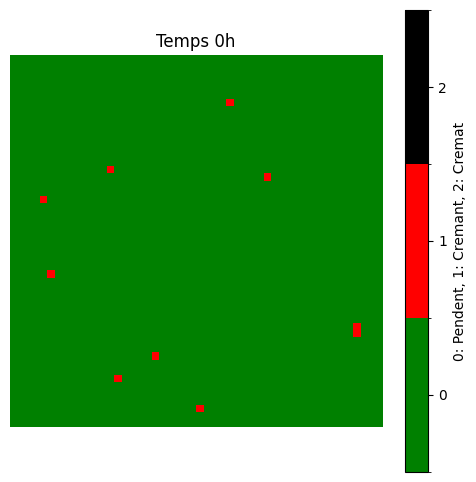

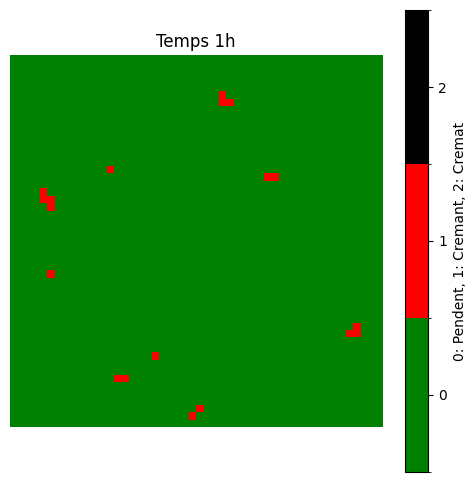

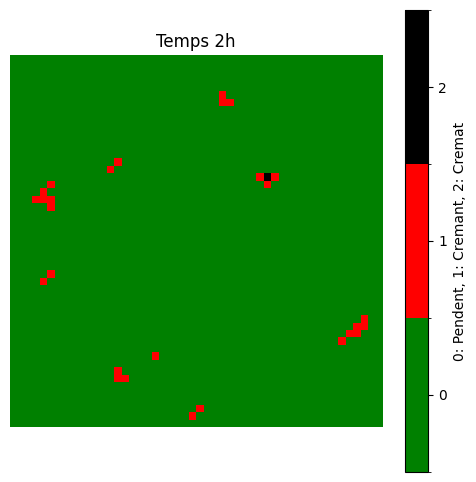

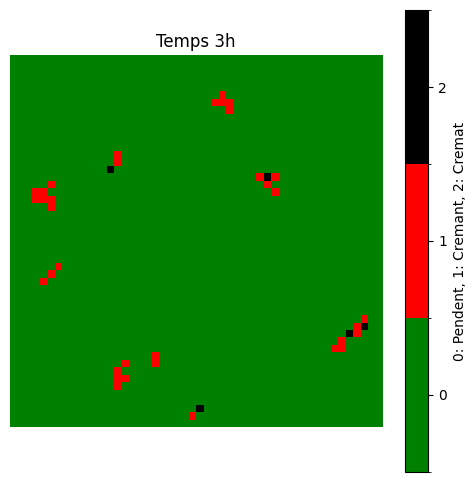

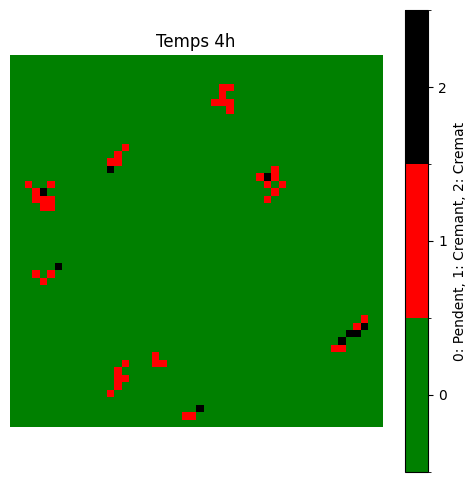

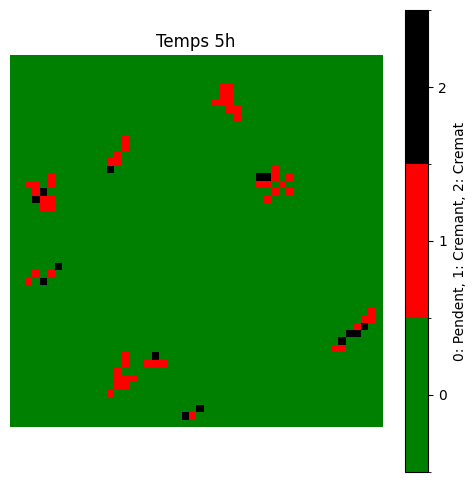

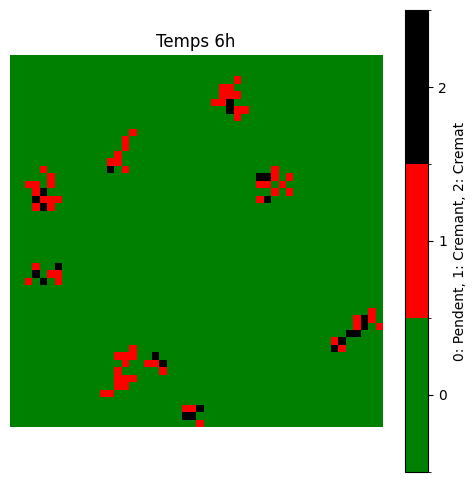

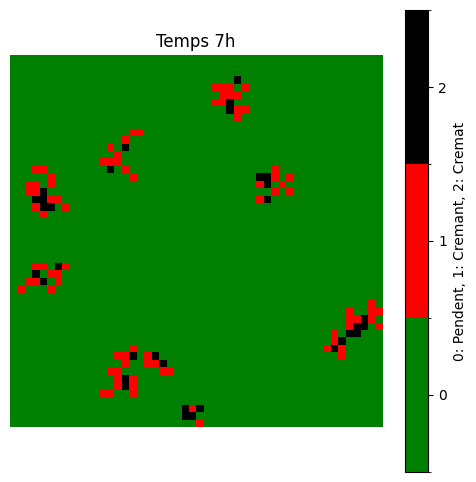

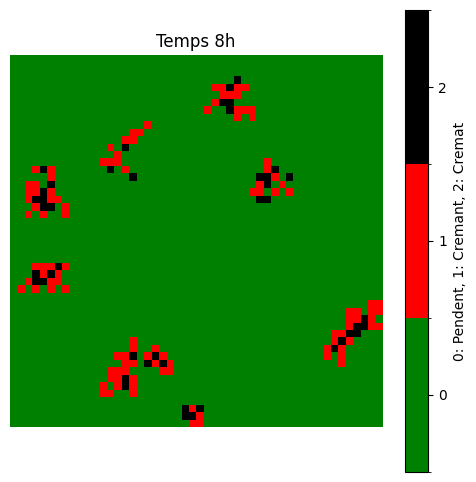

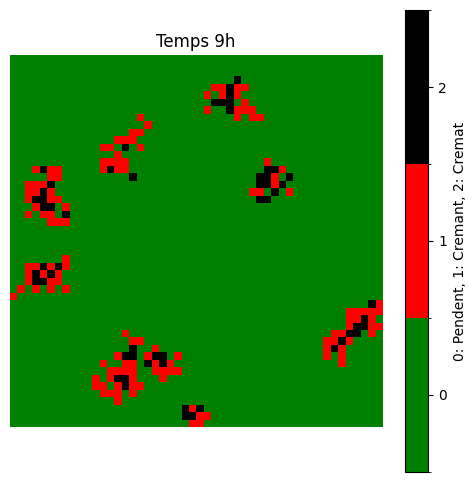

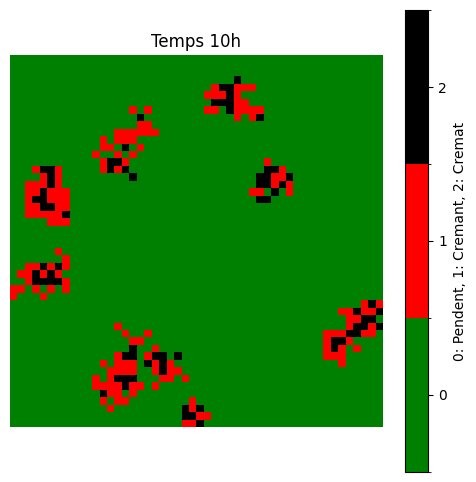

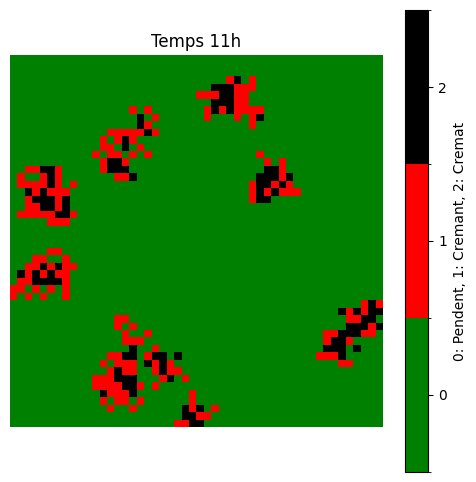

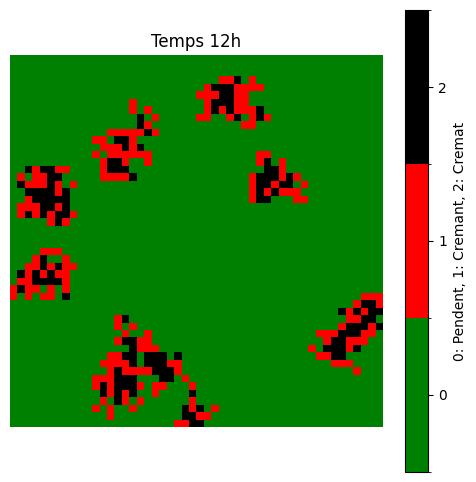

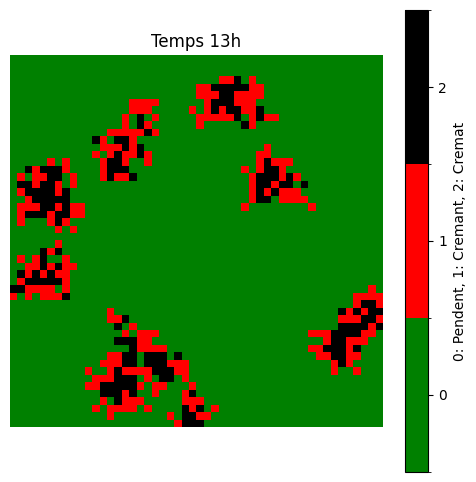

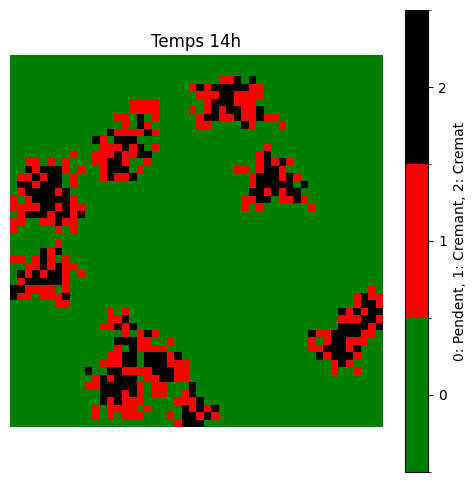

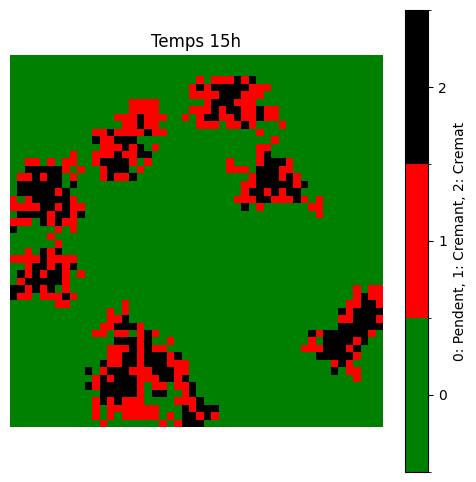

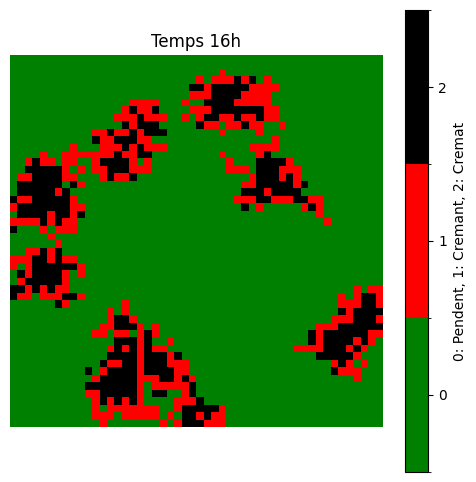

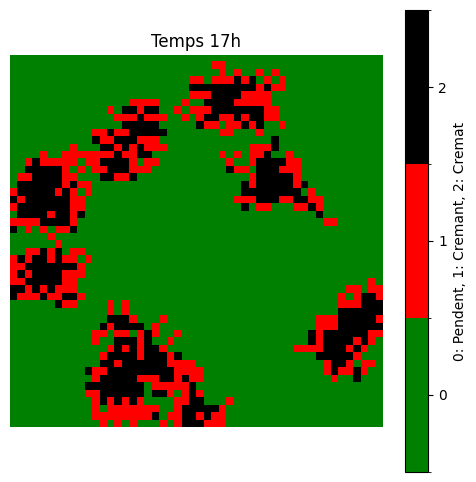

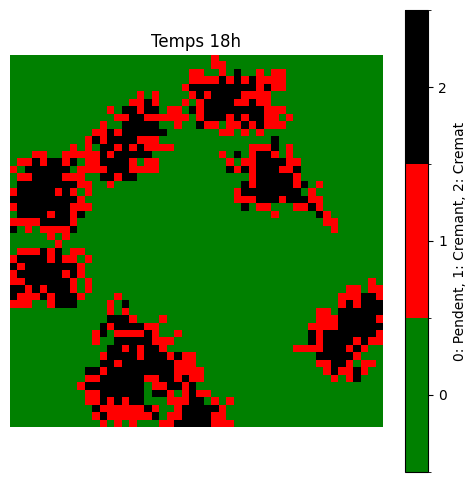

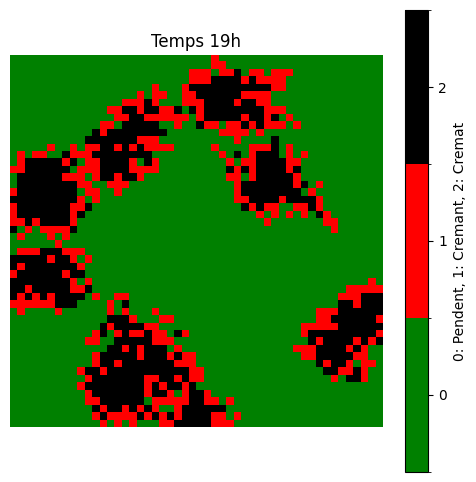

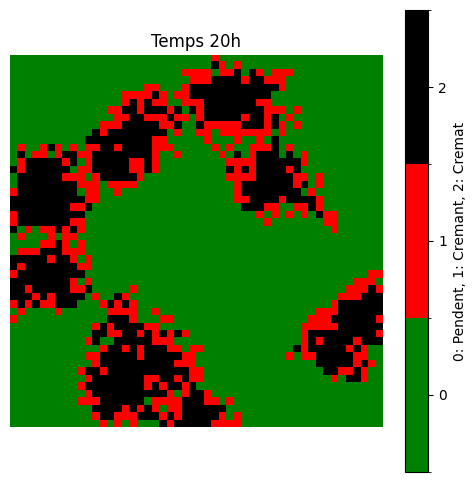

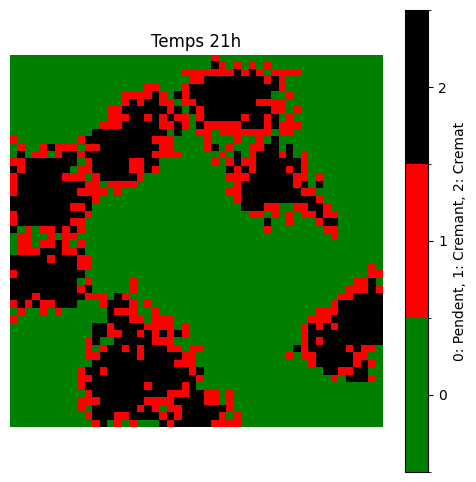

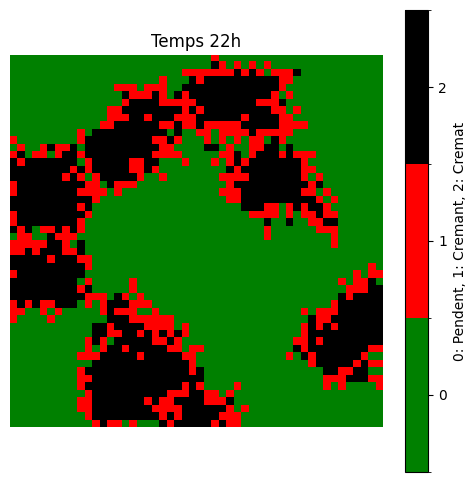

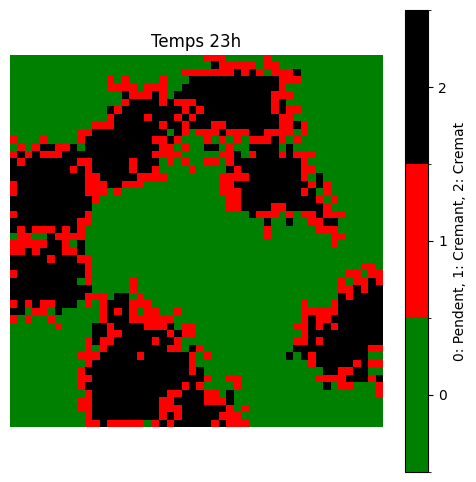

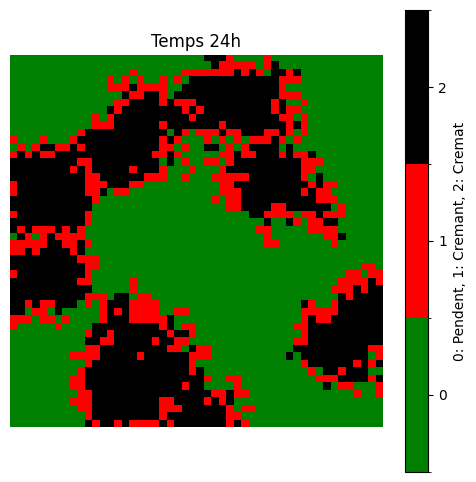

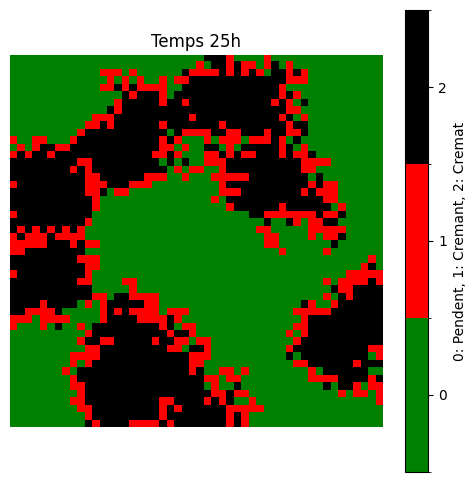

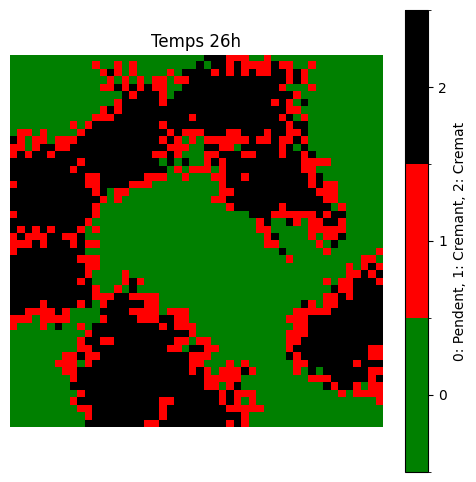

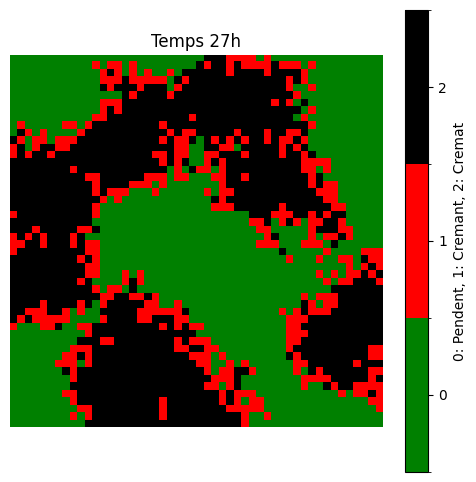

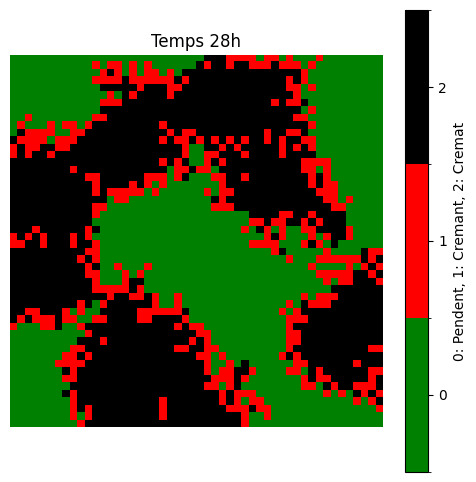

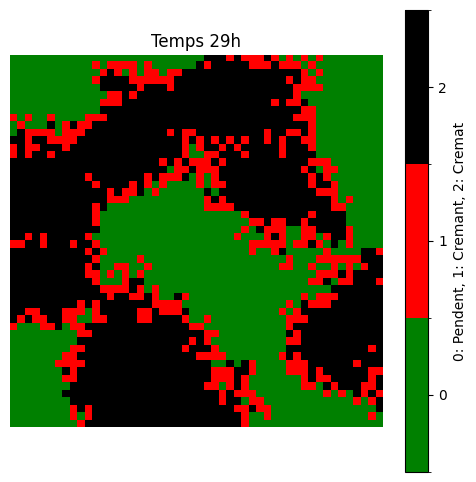

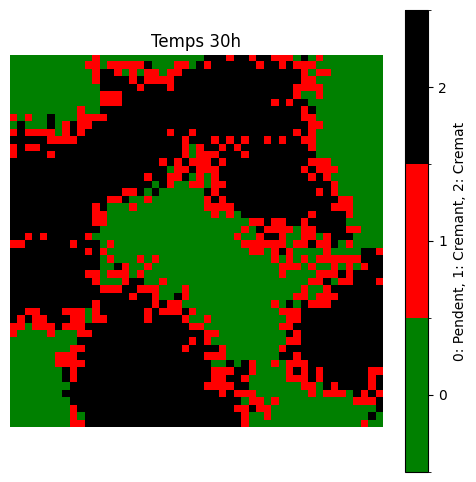

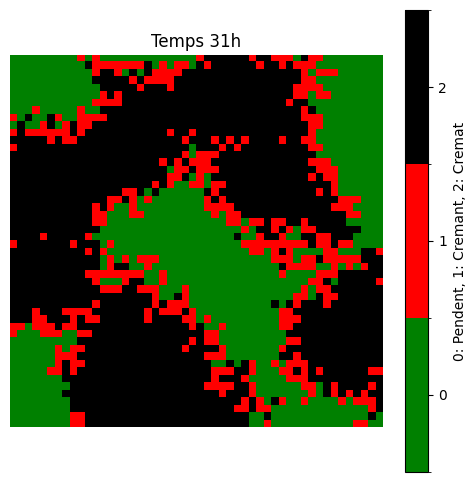

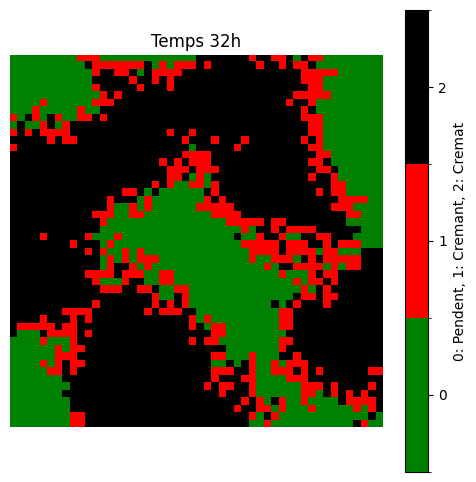

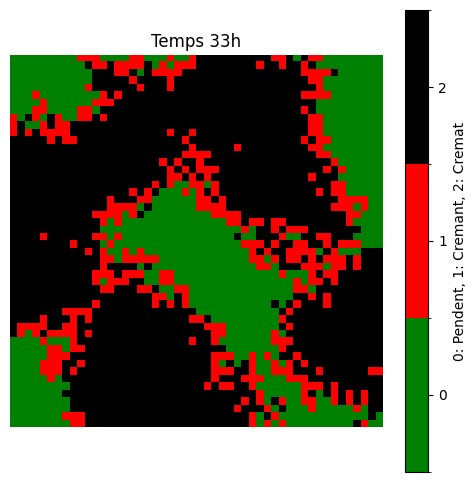

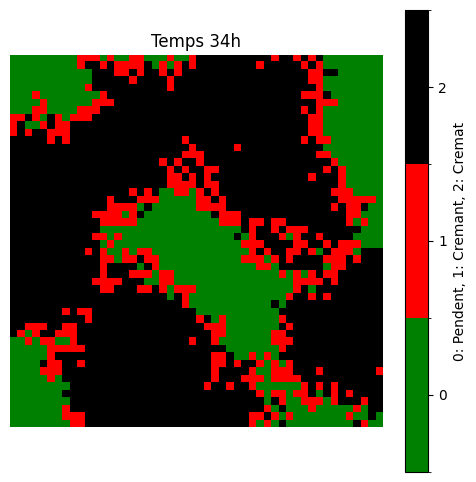

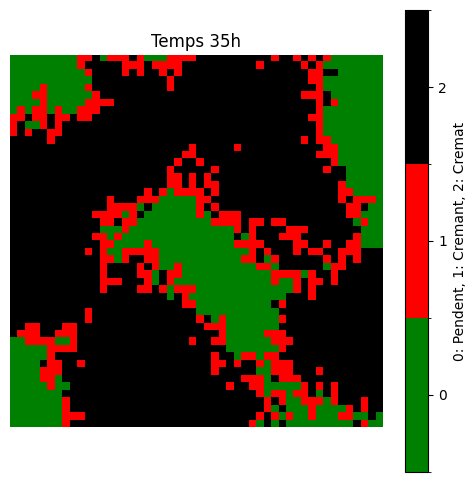

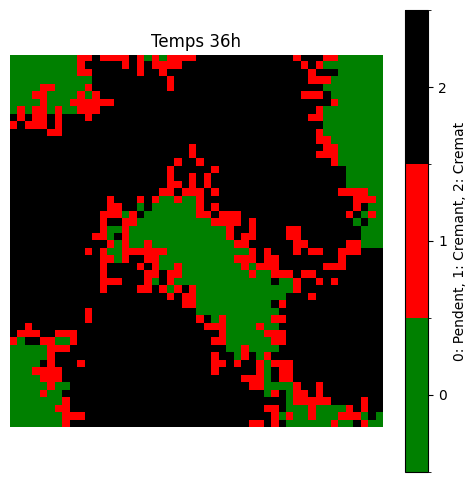

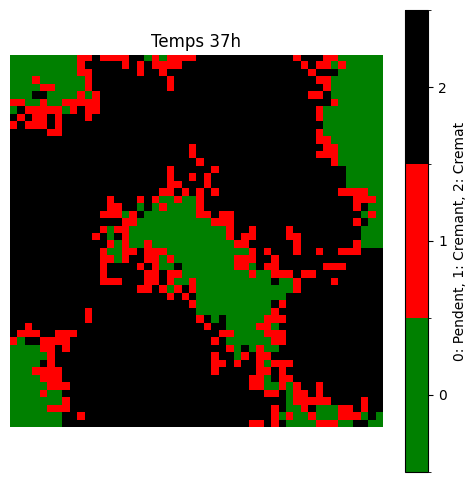

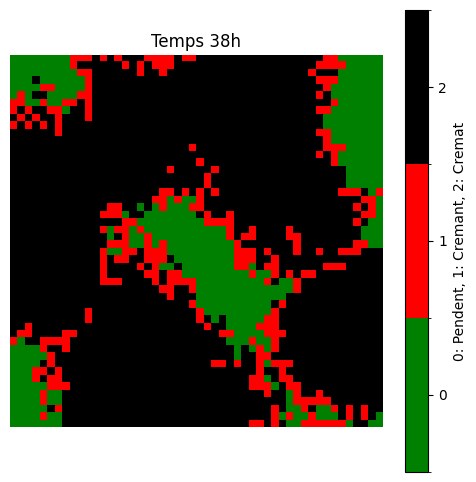

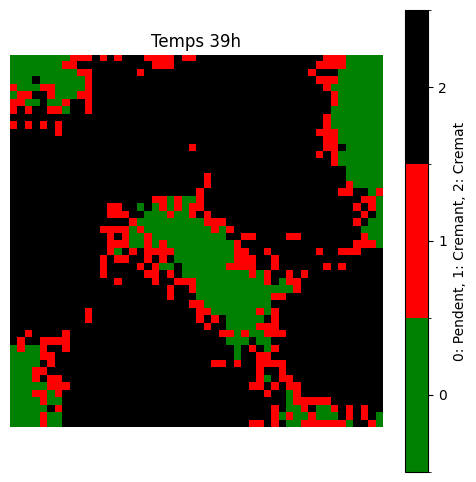

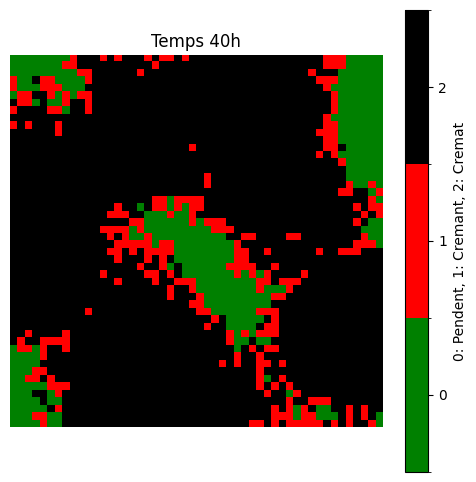

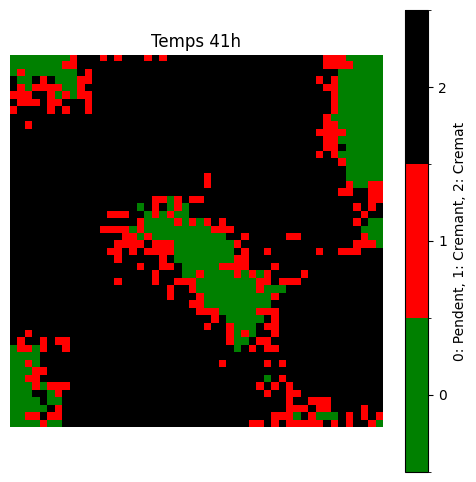

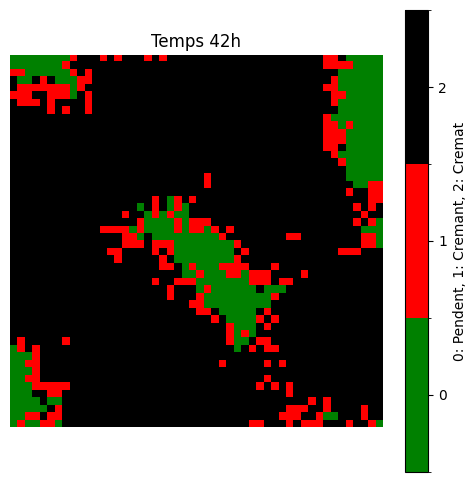

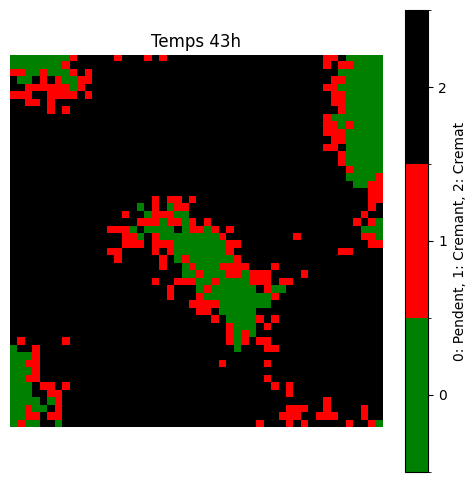

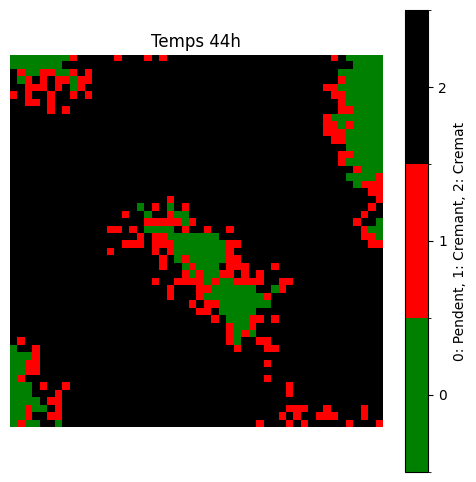

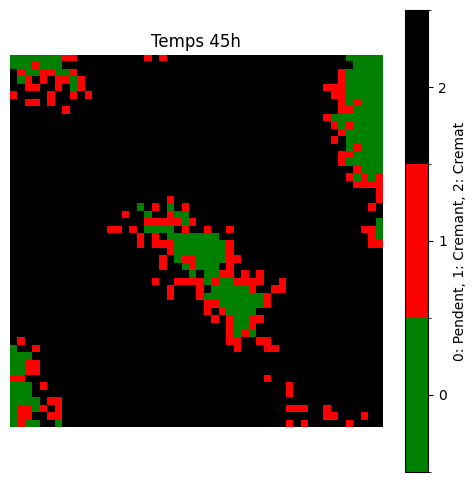

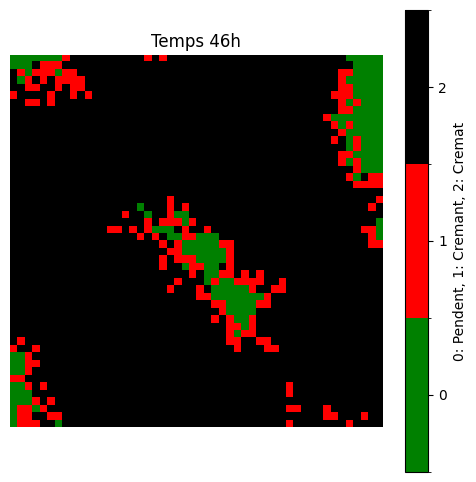

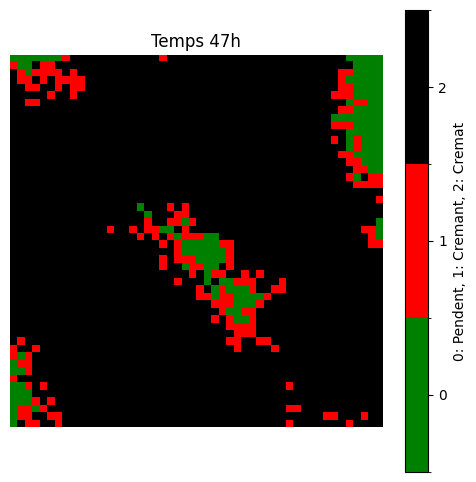

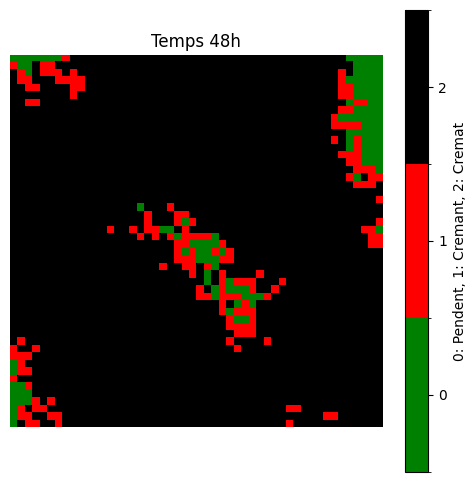

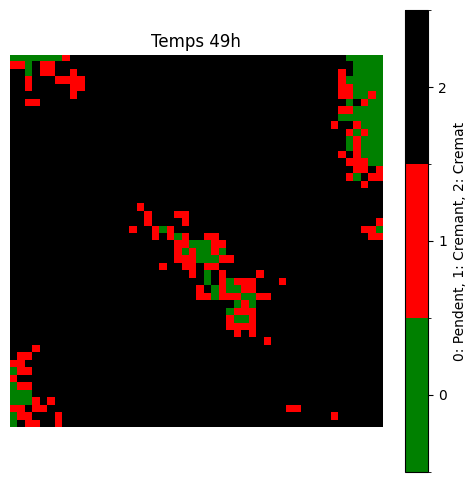

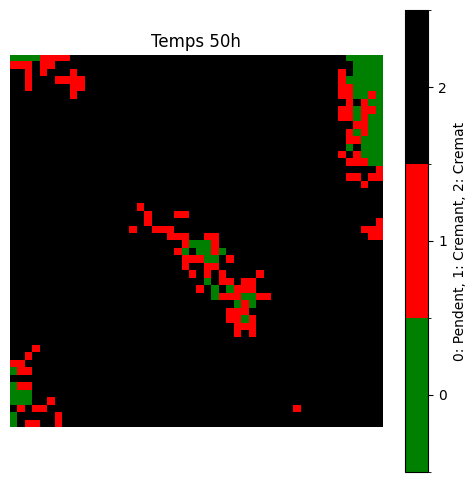

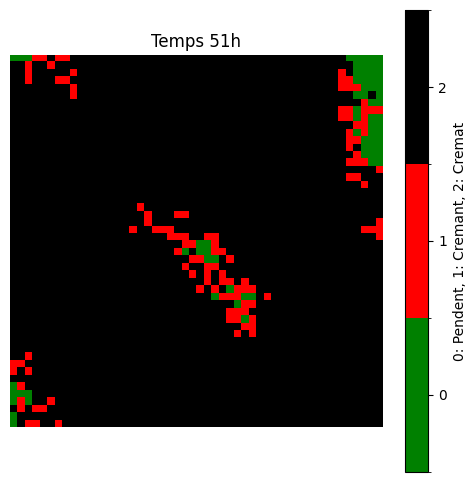

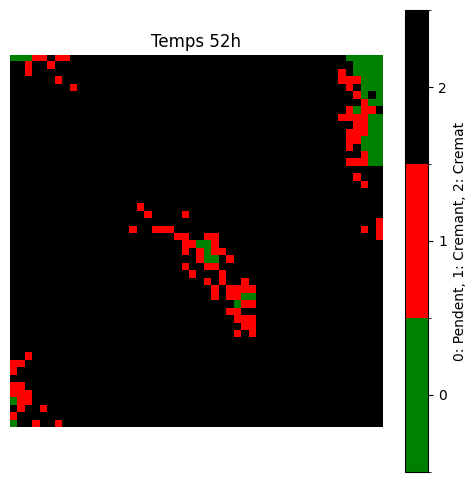

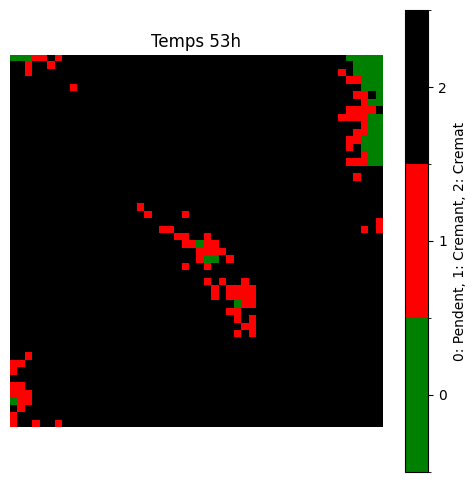

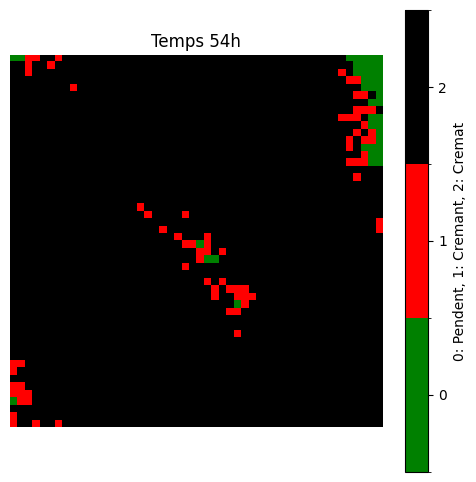

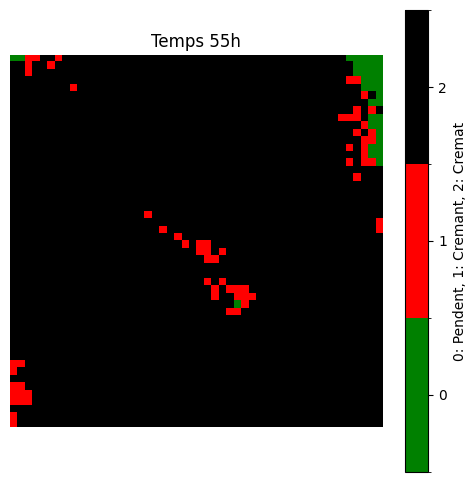

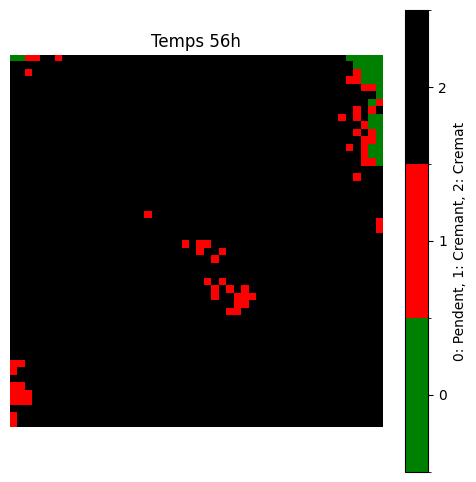

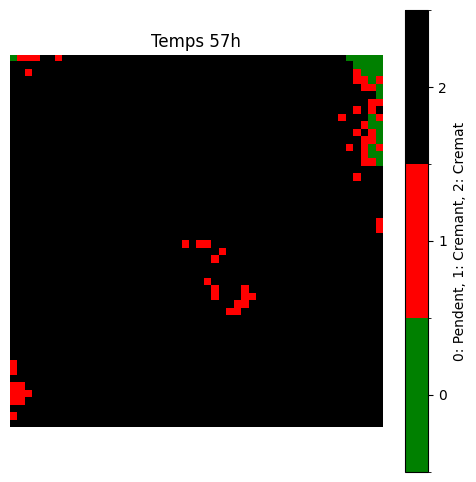

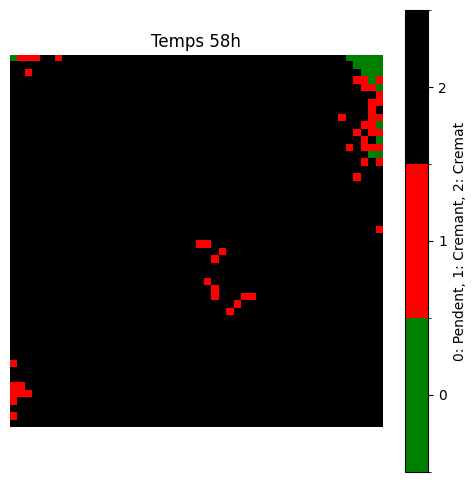

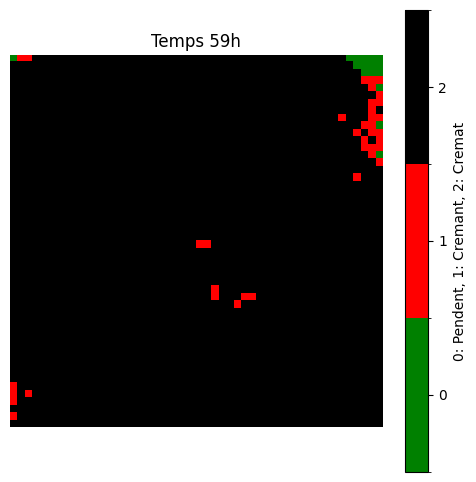

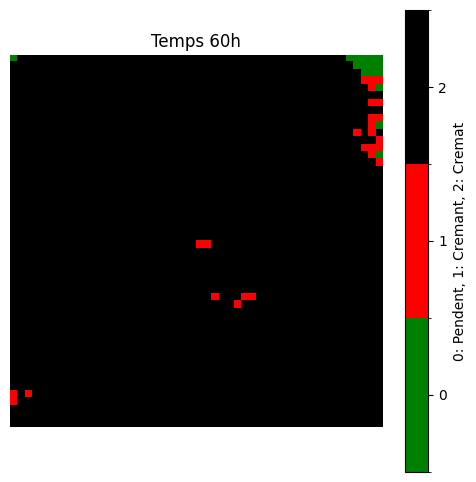

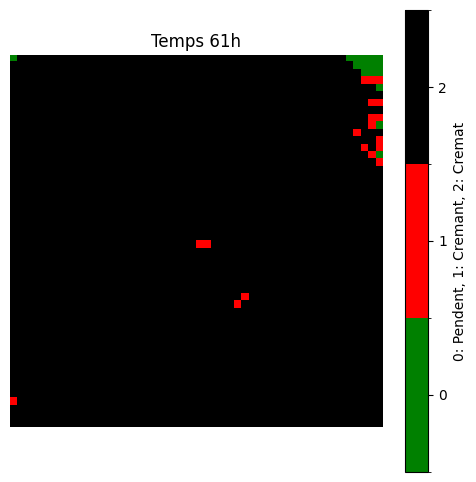

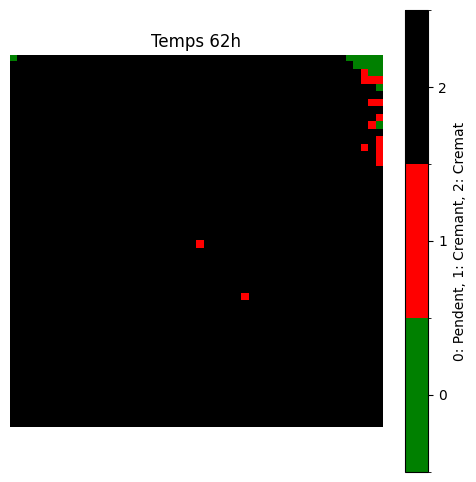

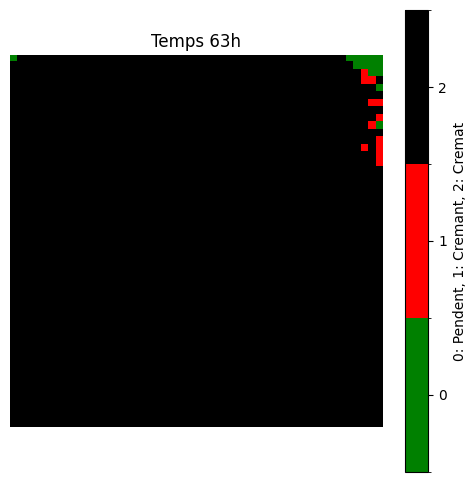

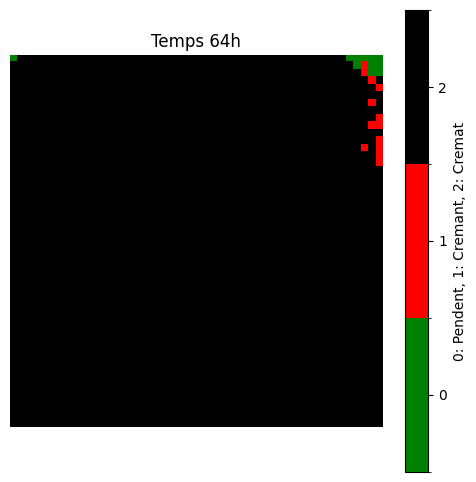

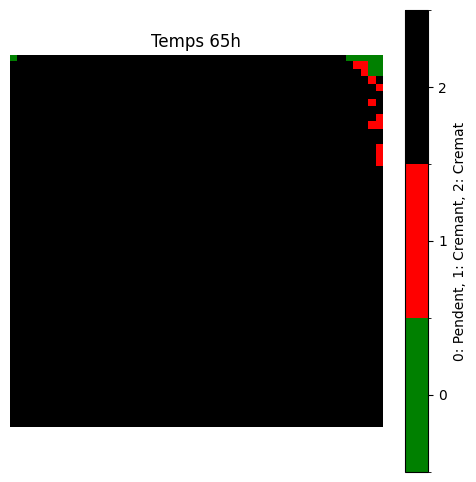

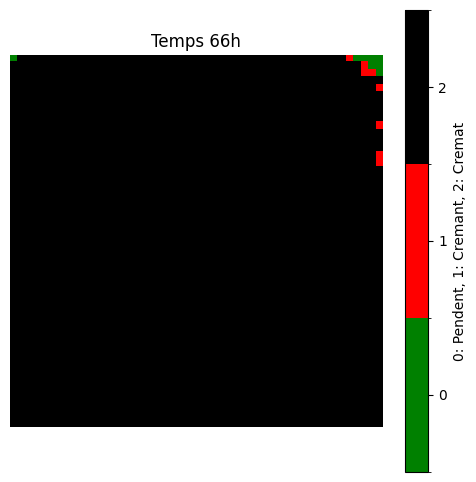

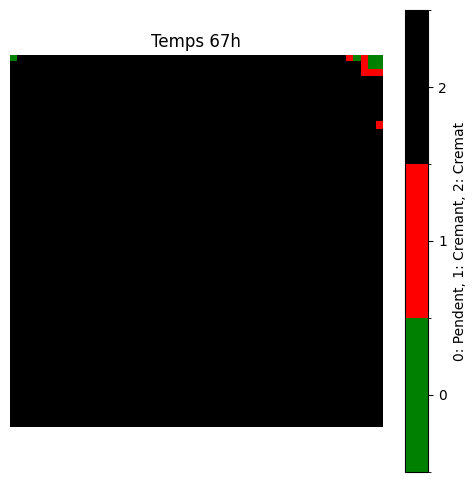

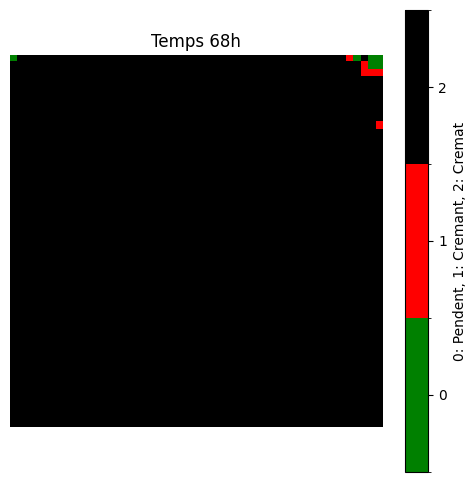

Incendi aturat per falta de propagació en 68 hores.


In [7]:
# === 4. Funció per visualitzar l'estat ===
def plot_state(state, step):
    cmap = colors.ListedColormap(['green', 'red', 'black'])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.figure(figsize=(6,6))
    plt.imshow(state, cmap=cmap, norm=norm)
    plt.title(f'Temps {step}h')
    plt.colorbar(ticks=[0,1,2], label='0: Pendent, 1: Cremant, 2: Cremat')
    plt.axis('off')
    plt.show()

# === 5. Simulació ===
max_steps = 100
for step in range(max_steps):
    plot_state(state, step)
    next_state, next_humidity_timer, next_vegetation_timer = update_fire(state, humidity, vegetation, humidity_timer, vegetation_timer)

    # Comprovem si hi ha canvi
    if np.array_equal(next_state, state):
        print(f"Incendi aturat per falta de propagació en {step} hores.")
        break

    state = next_state
    humidity_timer = next_humidity_timer
    vegetation_timer = next_vegetation_timer
